### Линейная регрессия


* переменные - независимые
* используется для задачи регрессии - предсказание количественных данных

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
url = 'https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/refs/heads/master/data/house_sales.csv'
data_king = pd.read_csv(url, sep='\t')

In [5]:
data_king.head(3)

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False


In [23]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

In [24]:
house_lm = LinearRegression()

In [25]:
house_lm.fit(data_king[predictors], data_king[outcome])

LinearRegression()

In [18]:
print(f'Пересечение: {house_lm.intercept_:.3f}')
print('Коэффициенты:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Пересечение: -521871.368
Коэффициенты:
 SqFtTotLiving: 228.8306036024076
 SqFtLot: -0.06046682065306541
 Bathrooms: -19442.840398321052
 Bedrooms: -47769.95518521427
 BldgGrade: 106106.96307898087


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
fitted = house_lm.predict(data_king[predictors])
RMSE = np.sqrt(mean_squared_error(data_king[outcome], fitted))
r2 = r2_score(data_king[outcome], fitted)

print(f'RMSE: {RMSE}')
print(f'R2: {r2}')

RMSE: 261220.19743696266
R2: 0.5405875253381902


Фиктивные переменные dummy variable для предсказания

In [32]:
pd.get_dummies(data_king['PropertyType']).head()

,Multiplex,Single Family,Townhouse
1,True,False,False
2,False,True,False
3,False,True,False
4,False,True,False
5,False,True,False


In [50]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
'BldgGrade', 'PropertyType']

In [51]:
X = pd.get_dummies(data_king[predictors], drop_first=True)

In [52]:
house_lm_factor = LinearRegression()
house_lm_factor.fit(X, data_king[outcome])

LinearRegression()

In [53]:
print(f'Пересечение: {house_lm_factor.intercept_:.3f}')
print('Коэффициенты:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Пересечение: -446841.366
Коэффициенты:
 SqFtTotLiving: 228.8306036024076
 SqFtLot: -0.06046682065306541
 Bathrooms: -19442.840398321052
 Bedrooms: -47769.95518521427
 BldgGrade: 106106.96307898087


In [54]:
pd.DataFrame(data_king['ZipCode'].value_counts()).transpose()

ZipCode,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98051,98024,98354,98050,98057,98288,98224,98068,98113,98043
count,788,671,641,620,619,614,575,517,513,502,...,32,31,9,7,4,4,3,1,1,1


### Логистическая регрессия

* зависимая переменная - номинантивная
* независимая переменная - номинантивная/количественная
* используется для задачи классификации - да/нет, классификация по группам


In [57]:
import  numpy as np
p = -1
print(np.exp(p)/(1+np.exp(p)))


0.2689414213699951


In [86]:
url = 'https://stepik.org/media/attachments/course/524/train.csv'
data_titanic = pd.read_csv(url)

In [87]:
data_titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [88]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

Без предикторов

In [89]:
data_titanic.Survived.value_counts()
np.log(342/549)
glm_binom2 = smf.glm(formula="Survived ~ 1",
                     data=data_titanic, family=sm.families.Binomial())
model = glm_binom2.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      890
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -593.33
Date:                Tue, 28 Jan 2025   Deviance:                       1186.7
Time:                        15:13:49   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4733      0.069     -6.870      0.000      -0.608      -0.338
==============================================================================
"""

С предиктором SEX


In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
glm_binom2 = smf.glm(formula="Survived ~ C(Sex)",
                     data=data_titanic, family=sm.families.Binomial())
model = glm_binom2.fit()
model.summary()
pd.crosstab(data_titanic.Survived, data_titanic.Sex)
log_odds_male = np.log(109 / 468)
log_odds_female = np.log(233 / 81) # intercept
print(log_odds_male, log_odds_female)
odds_male = 109/468
odds_female = 233/81
odds_ratio = np.log(odds_male / odds_female) # coef_
print(odds_ratio)

# sklearn
y = data_titanic.Survived
X = pd.get_dummies(data_titanic.Sex, drop_first=True)
model = LogisticRegression()
model.fit(X,y)
pd.DataFrame(
    data=[model.intercept_.item(), model.coef_.item()],
    index=['intercept', 'coef'],
    columns=['coefs']
)




-1.457120413688503 1.0565892988932617
-2.5137097125817647


,coefs
intercept,1.016288
coef,-2.445980


In [92]:
from statsmodels.graphics.mosaicplot import mosaic

### Логистическая регрессия с двумя предикторами

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
data_titanic["Sex"] = data_titanic["Sex"].replace("male", 1).replace("female", 0)
x = data_titanic[["Sex", "Pclass"]].values
y = data_titanic["Survived"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)
model = LogisticRegression(n_jobs=1).fit(x_train, y_train)
y_predict = model.predict(x_test)
score = model.score(x_test, y_test)

mode = smf.logit(formula="Survived ~ C(Sex)*C(Pclass)", data=data_titanic).fit()
display(mode.summary())


Optimization terminated successfully.
         Current function value: 0.447866
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                  0.3274
Time:                        15:13:56   Log-Likelihood:                -399.05
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.670e-82
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.4122      0.587      5.815      0.000       2.262       4.562
C(Sex)[T.1]                   -3.9494      0.616     -6.411      0.000      -5.157      -2.742
C(Pclass)[T.2]                -0.9555      0.725     -1.318      0.187      -2.376       0.465
C(Pclass)[T.3]                -3.4122      0.610     -5.594      0.000      -4.608      -2.217
C(Sex)[T.1]:C(Pclass)[T.2]    -0.1850      0.794     -0.233      0.816      -1.741       1.371
C(Sex)[T.1]:C(Pclass)[T.3]     2.0958      0.657      3.189      0.001       0.808       3.384
==============================================================================================
"""

в значение intercept - женщины, 1-ый класс

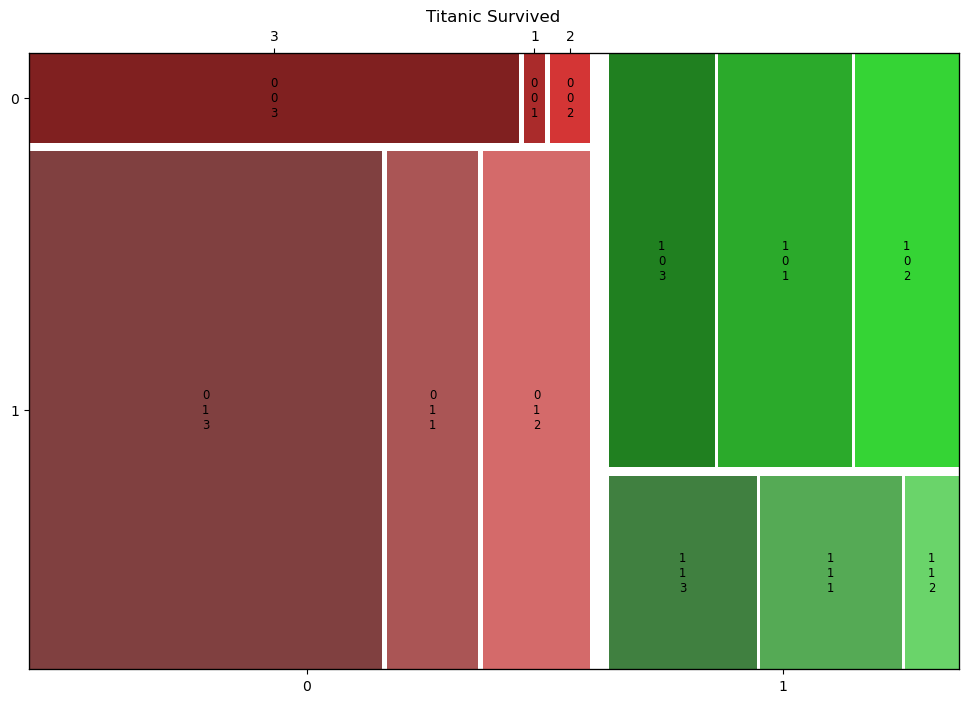

In [95]:
plt.rcParams["figure.figsize"]=(12,8)
mosaic(data_titanic, ["Survived", "Sex", "Pclass"], gap=0.02, title="Titanic Survived")
plt.show()

0.8334113864245404